In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.special import softmax
from itertools import product
import numpy as np
from utils import *
from model import *
import time
import seaborn as sns
sns.set_context('talk')

%load_ext autoreload
%reload_ext autoreload
%autoreload 2
%matplotlib inline

- blocked split on 41
$$
\frac{\lambda}{S\lambda+40}(120+\beta) < \frac{\alpha}{S}
$$
- interleaved stay on trial 2
$$
\frac{\lambda}{S\lambda+1}(3+\beta) > \frac{\alpha}{S}
$$

In [2]:
S = 2
lmda = 1.5
alpha = 210
beta = 300

In [3]:
middle_81 = lambda l,b: ((l+20)/(S*l+80))*(120+b)
block_41_S1 = lambda l,b: (l/((S*l)+40))*(120+b)
split_thresh = lambda l,a: (l/(S*l))*a
int_S1 = lambda l,b: ((l+0)/((S*l)+1))*(3+b)

block_81_S1 = lambda l:   ((l+40)/((S*l)+40))*(120)
block_81_S2 = lambda l,b: ((l+0)/ ((S*l)+40))*(120+b)

In [4]:
xplt_beta = np.arange(0,500)
xplt_alpha = np.arange(0,500)

### interleaved stay on trial 2

True

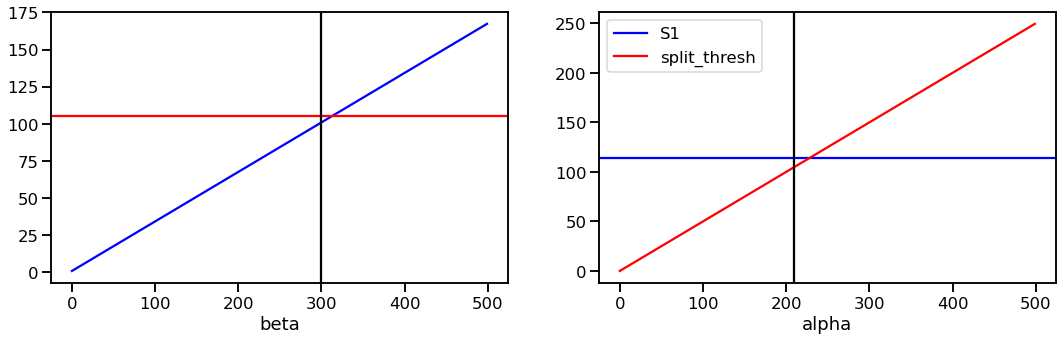

In [5]:
f,axar = plt.subplots(1,2,figsize=(18,5))
##
ax = axar[0]
ax.plot(int_S1(1,xplt_beta),c='b',label='S1')
ax.axhline(split_thresh(lmda,alpha),c='r',label='split_thresh')
ax.set_xlabel('beta')
ax.axvline(beta,c='k')
##
ax = axar[1]
ax.axhline(int_S1(lmda,beta),c='b',label='S1')
ax.plot(split_thresh(lmda,xplt_alpha),c='r',label='split_thresh')
ax.set_xlabel('alpha')
ax.axvline(alpha,c='k')
plt.legend()

cond = int_S1(lmda,beta)>split_thresh(lmda,alpha)
cond

## split middle trial 81 < S1

False

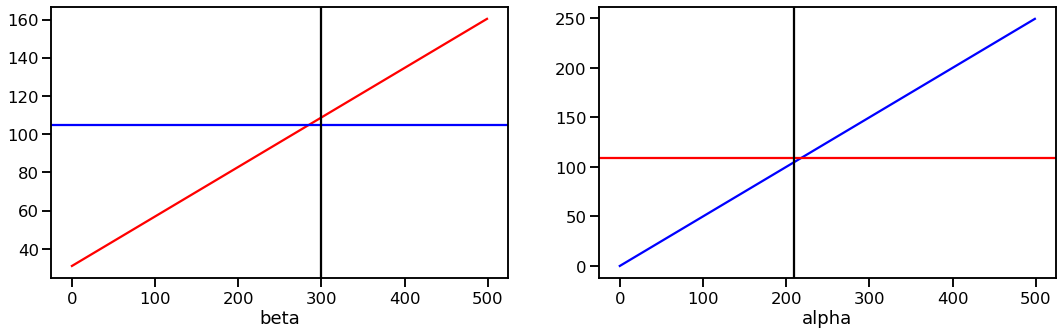

In [6]:
f,axar = plt.subplots(1,2,figsize=(18,5))
## 
ax = axar[0]
ax.plot(middle_81(lmda,xplt_beta),label='S1',c='r')
ax.axhline(split_thresh(lmda,alpha),label='split_thresh',c='b')
ax.axvline(beta,c='k')
ax.set_xlabel('beta')
##
ax = axar[1]
ax.plot(split_thresh(lmda,xplt_alpha),label='split_thresh',c='b')
ax.axhline(middle_81(lmda,beta),label='S1',c='r')
ax.set_xlabel('alpha')
ax.axvline(alpha,c='k')
## 
cond = middle_81(lmda,beta)<split_thresh(lmda,alpha)
cond

## block split at 41

True

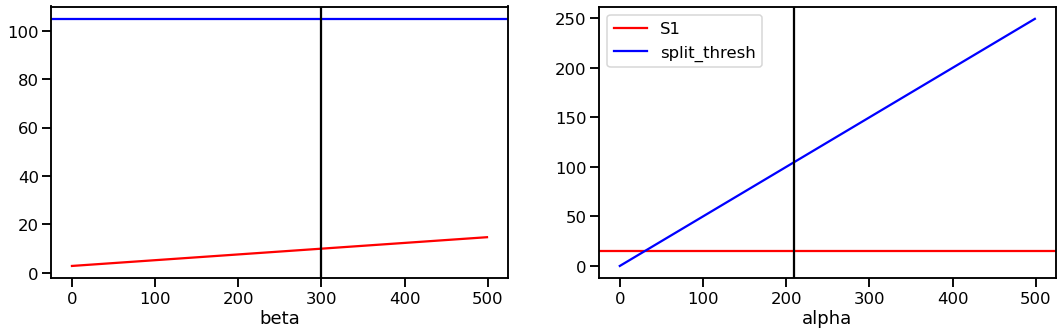

In [7]:
f,axar = plt.subplots(1,2,figsize=(18,5))
##
ax = axar[0]
ax.axhline(split_thresh(lmda,alpha),c='b',label='split_thresh')
ax.plot(block_41_S1(1,xplt_beta),c='r',label='S1')
ax.set_xlabel('beta')
ax.axvline(beta,c='k')
##
ax = axar[1]
ax.axhline(block_41_S1(lmda,beta),c='r',label='S1')
ax.plot(split_thresh(lmda,xplt_alpha),c='b',label='split_thresh')
ax.set_xlabel('alpha')
ax.axvline(alpha,c='k')
plt.legend()
block_41_S1(lmda,beta)<split_thresh(lmda,alpha)

True

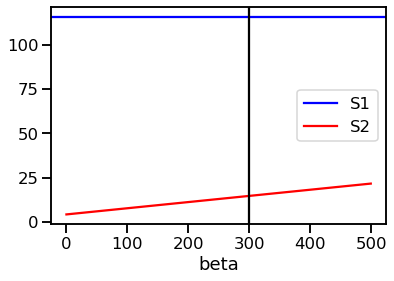

In [8]:
# switch to S1 at blocked 80 S1>S2

#
f,axar = plt.subplots(1,1)
ax=axar
ax.axhline(block_81_S1(lmda),c='b',label='S1')
ax.plot(block_81_S2(lmda,xplt_beta),c='r',label='S2')
plt.legend()
ax.set_xlabel('beta')

ax.axvline(beta,c='k')
cond = block_81_S1(lmda)>block_81_S2(lmda,beta)
cond